## Import Library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

## Import dataset

In [3]:
dataset = pd.read_csv(r'C:\Users\Mahira\Desktop\daboot\python\Ders 9\room.csv')

In [4]:
dataset.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


In [9]:
dataset = dataset.drop('date', axis = 1)

In [10]:
dataset.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [11]:
dataset.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [12]:
dataset.dtypes

Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

<AxesSubplot:>

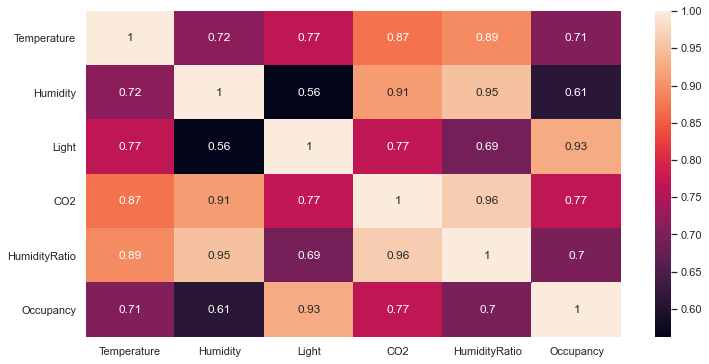

In [13]:
plt.figure(figsize = (12,6))
sns.heatmap(dataset.corr(), annot =True)

## Outlier Treatment

<AxesSubplot:xlabel='Light', ylabel='Density'>

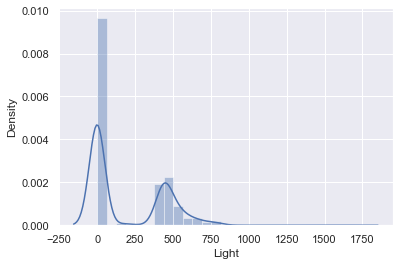

In [15]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(dataset['Light'])

<AxesSubplot:xlabel='Light'>

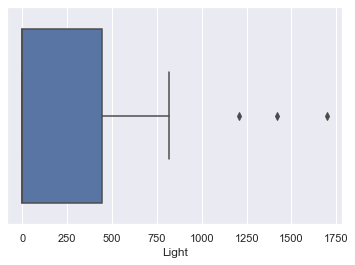

In [16]:
sns.boxplot(dataset['Light'])

In [17]:
Q1=dataset['Light'].quantile(0.25)
Q3=dataset['Light'].quantile(0.75)
IQR=Q3-Q1
Lower = Q1-IQR
Upper = Q3+IQR
print(Lower, Upper)

-442.5 885.0


In [18]:
data1 = dataset[dataset['Light'] < Upper]
data1.shape

(2662, 6)

<AxesSubplot:xlabel='Light', ylabel='Density'>

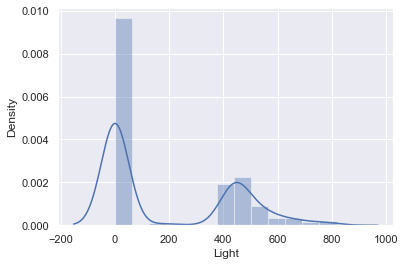

In [19]:
sns.distplot(data1['Light'])

<AxesSubplot:xlabel='CO2', ylabel='Density'>

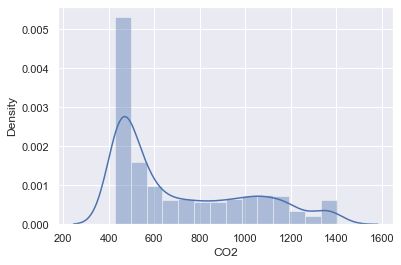

In [20]:
sns.distplot(data1['CO2'])

<AxesSubplot:xlabel='CO2'>

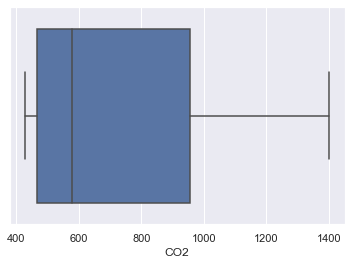

In [26]:
sns.boxplot(data1['CO2'])

In [27]:
dataset_cleaned = data1.copy()
dataset_cleaned.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000
mean,21.432487,25.353799,191.820017,717.642897,0.004027,0.364012
std,1.027768,2.438212,246.719570,292.741171,0.000611,0.481242
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003528,0.000000
50%,20.890000,25.000000,0.000000,579.600000,0.003815,0.000000
75%,22.345000,26.866667,442.500000,956.312500,0.004532,1.000000
max,24.408333,31.472500,817.000000,1402.250000,0.005378,1.000000


## Multicollinearity

In [28]:
dataset_cleaned.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# most correlated numerical cols with Occupancy
variables = dataset_cleaned[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
vif = pd.DataFrame()
vif["Features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.sort_values(by=['VIF'])

,Features,VIF
2,Light,5.802718
3,CO2,149.971368
0,Temperature,528.105939
1,Humidity,911.769568
4,HumidityRatio,1571.318074


In [35]:
variables = dataset_cleaned[['Temperature', 'Light']]
vif = pd.DataFrame()
vif["Features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.sort_values(by=['VIF'])

,Features,VIF
0,Temperature,1.702662
1,Light,1.702662


In [36]:
# I dropped CO2, Humidity and HumdityRatio columns and chose only Temperature and Light.
data_no_multicol = dataset_cleaned.drop(['CO2', 'Humidity', 'HumidityRatio'],axis=1)
data_no_multicol.columns

Index(['Temperature', 'Light', 'Occupancy'], dtype='object')

## Inputs and Target declarement

In [37]:
# The target(s) (dependent variable) is Occupancy
target = data_no_multicol['Occupancy']

# The inputs are the rest.
inputs = data_no_multicol[['Temperature', 'Light']]

## Train and Test data splitting

In [38]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [39]:
classifier_def = KNeighborsClassifier()
classifier_def.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
classifier_def.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [41]:
y_pred = classifier_def.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
conmat_df = pd.DataFrame(cm)
conmat_df.columns = ['Predicted 0','Predicted 1']
conmat_df = conmat_df.rename(index={0: 'Real Value 0',1:'Real Value 1'})
conmat_df

,Predicted 0,Predicted 1
Real Value 0,343,4
Real Value 1,7,179


In [45]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy (Default K value):', round(accuracy*100, 2), '%')

Accuracy (Default K value): 97.94 %


In [47]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    model.fit(x_train, y_train)  
    y1_pred = model.predict(x_test) 
    error = sqrt(mean_squared_error(y_test, y1_pred)) 
    rmse_val.append(error) 

k_list = list(range(1, 21))
k_model = pd.DataFrame({'K_value': k_list, 'RMSE': rmse_val})
k_model

,K_value,RMSE
0,1,0.150047
1,2,0.183769
2,3,0.136973
3,4,0.167758
4,5,0.143659
5,6,0.150047
6,7,0.129944
7,8,0.143659
8,9,0.136973
9,10,0.143659


In [48]:
k_model.sort_values('RMSE').head(1)

,K_value,RMSE
17,18,0.1146


In [53]:
classifier_rms = KNeighborsClassifier(n_neighbors=18, leaf_size=12)
classifier_rms.fit(x_train, y_train)
y_pred1 = classifier_rms.predict(x_test)

In [54]:
cm1 = confusion_matrix(y_test, y_pred1)
conmat_df1 = pd.DataFrame(cm1)
conmat_df1.columns = ['Predicted 0','Predicted 1']
conmat_df1 = conmat_df.rename(index={0: 'Real Value 0',1:'Real Value 1'})
conmat_df1

,Predicted 0,Predicted 1
Real Value 0,343,4
Real Value 1,7,179


In [55]:
accuracy1 = accuracy_score(y_test,y_pred1)
print('Accuracy (RMSE search):', round(accuracy1*100, 2), '%')

Accuracy (RMSE search): 98.69 %


In [66]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 30, num = 5)]
leaf_size=[int(x) for x in np.linspace(start = 1, stop = 100, num = 5)]

params = {'n_neighbors': n_neighbors, 'leaf_size':leaf_size}

knn = neighbors.KNeighborsClassifier()

model = RandomizedSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 8, 'leaf_size': 75}

In [67]:
classifier_rand = KNeighborsClassifier(n_neighbors= 8, leaf_size = 75)
classifier_rand.fit(x_train, y_train)

y_pred2 = classifier.predict(x_test)

In [68]:
accuracy2 = accuracy_score(y_test,y_pred2)
print('Accuracy (Randomized Search):', round(accuracy2*100, 2), '%')

Accuracy (Randomized Search): 98.69 %


## Accuracy results

In [69]:
print('Accuracy (Default K value):', round(accuracy*100, 2), '%')
print('Accuracy (RMSE search):', round(accuracy1*100, 2), '%')
print('Accuracy (Randomized Search):', round(accuracy2*100, 2), '%')

Accuracy (Default K value): 97.94 %
Accuracy (RMSE search): 98.69 %
Accuracy (Randomized Search): 98.69 %
